### **Predictive Modeling for Bike-Sharing Usage**


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.preprocessing import scale
import math

In [2]:
# Mount Google Drive in Colab
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


## Reading Data files

### Capital Bikeshare Data
https://ride.capitalbikeshare.com/system-data

We deal with data from Jan to Jun in 2023

In [3]:
# read csv files (Update your file paths)
df_Feb=pd.read_csv('/content/drive/Shareddrives/DNSC 6314/202302-captialbikeshare-tripdata.csv') # Note: a different file name
df_Mar=pd.read_csv('/content/drive/Shareddrives/DNSC 6314/202303-capitalbikeshare-tripdata.csv')
df_Apr=pd.read_csv('/content/drive/Shareddrives/DNSC 6314/202304-capitalbikeshare-tripdata.csv')
df_May=pd.read_csv('/content/drive/Shareddrives/DNSC 6314/202305-capitalbikeshare-tripdata.csv')
df_Jun=pd.read_csv('/content/drive/Shareddrives/DNSC 6314/202306-capitalbikeshare-tripdata.csv')

In [4]:
# concat data
df=pd.concat([df_Feb,df_Mar,df_Apr,df_May,df_Jun])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1749886 entries, 0 to 430669
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    float64
 6   end_station_name    object 
 7   end_station_id      float64
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(6), object(7)
memory usage: 186.9+ MB


In [5]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,6D7F3F3DDD864A41,classic_bike,2023-02-04 21:08:26,2023-02-04 21:16:39,New Jersey Ave & N St NW/Dunbar HS,31636.0,8th & V St NW,31134.0,38.907333,-77.015360,38.917716,-77.022684,member
1,1B4FD92511BA8869,classic_bike,2023-02-28 18:24:01,2023-02-28 18:28:46,11th & Girard St NW,31126.0,8th & V St NW,31134.0,38.925636,-77.027112,38.917716,-77.022684,member
2,E215D5A904EC376F,classic_bike,2023-02-12 14:03:48,2023-02-12 14:05:44,3rd & H St NW,31604.0,1st & H St NW,31638.0,38.899408,-77.015289,38.900358,-77.012108,member
3,AF176FEC3204AEB5,classic_bike,2023-02-08 19:25:13,2023-02-08 19:33:08,7th St & Florida Ave NW,31109.0,7th & F St NW / National Portrait Gallery,31232.0,38.916137,-77.022003,38.897283,-77.022191,member
4,CB8BE52EB8F58E80,classic_bike,2023-02-27 14:48:59,2023-02-27 14:54:10,8th & V St NW,31134.0,8th & V St NW,31134.0,38.917716,-77.022684,38.917716,-77.022684,member


## Dealing with time and date

In [6]:
# Transform time to date ONLY
df['started_at_date'] = pd.to_datetime(df['started_at']).dt.date
df['ended_at_date'] = pd.to_datetime(df['ended_at']).dt.date

In [7]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,started_at_date,ended_at_date
0,6D7F3F3DDD864A41,classic_bike,2023-02-04 21:08:26,2023-02-04 21:16:39,New Jersey Ave & N St NW/Dunbar HS,31636.0,8th & V St NW,31134.0,38.907333,-77.015360,38.917716,-77.022684,member,2023-02-04,2023-02-04
1,1B4FD92511BA8869,classic_bike,2023-02-28 18:24:01,2023-02-28 18:28:46,11th & Girard St NW,31126.0,8th & V St NW,31134.0,38.925636,-77.027112,38.917716,-77.022684,member,2023-02-28,2023-02-28
2,E215D5A904EC376F,classic_bike,2023-02-12 14:03:48,2023-02-12 14:05:44,3rd & H St NW,31604.0,1st & H St NW,31638.0,38.899408,-77.015289,38.900358,-77.012108,member,2023-02-12,2023-02-12
3,AF176FEC3204AEB5,classic_bike,2023-02-08 19:25:13,2023-02-08 19:33:08,7th St & Florida Ave NW,31109.0,7th & F St NW / National Portrait Gallery,31232.0,38.916137,-77.022003,38.897283,-77.022191,member,2023-02-08,2023-02-08
4,CB8BE52EB8F58E80,classic_bike,2023-02-27 14:48:59,2023-02-27 14:54:10,8th & V St NW,31134.0,8th & V St NW,31134.0,38.917716,-77.022684,38.917716,-77.022684,member,2023-02-27,2023-02-27


## Preprocessed Data - Consider the GWSB station "22nd & H St NW"

### Count daily pickups

In [8]:
# Group and get pickup occurrence for 22nd & H St NW
df_sub1 = df[df['start_station_name']=="22nd & H St NW"]
df_grp1 = df_sub1.groupby(['started_at_date','start_station_name']).size()
df_pu=df_grp1.reset_index(name = "pu_ct")
df_pu

,started_at_date,start_station_name,pu_ct
0,2023-02-01,22nd & H St NW,20
1,2023-02-02,22nd & H St NW,26
2,2023-02-03,22nd & H St NW,14
3,2023-02-04,22nd & H St NW,12
4,2023-02-05,22nd & H St NW,17
...,...,...,...
145,2023-06-26,22nd & H St NW,21
146,2023-06-27,22nd & H St NW,20
147,2023-06-28,22nd & H St NW,26
148,2023-06-29,22nd & H St NW,32


### Count daily dropoffs

In [9]:
# Group and get drop off occurrence for 22nd & H St NW
df_sub2 = df[df['end_station_name']=="22nd & H St NW"]
df_grp2 = df_sub2.groupby(['ended_at_date','end_station_name']).size()
df_do=df_grp2.reset_index(name = "do_ct")
df_do

,ended_at_date,end_station_name,do_ct
0,2023-02-01,22nd & H St NW,24
1,2023-02-02,22nd & H St NW,28
2,2023-02-03,22nd & H St NW,17
3,2023-02-04,22nd & H St NW,13
4,2023-02-05,22nd & H St NW,24
...,...,...,...
145,2023-06-26,22nd & H St NW,18
146,2023-06-27,22nd & H St NW,21
147,2023-06-28,22nd & H St NW,26
148,2023-06-29,22nd & H St NW,43


### Visualize pickups and dropoffs

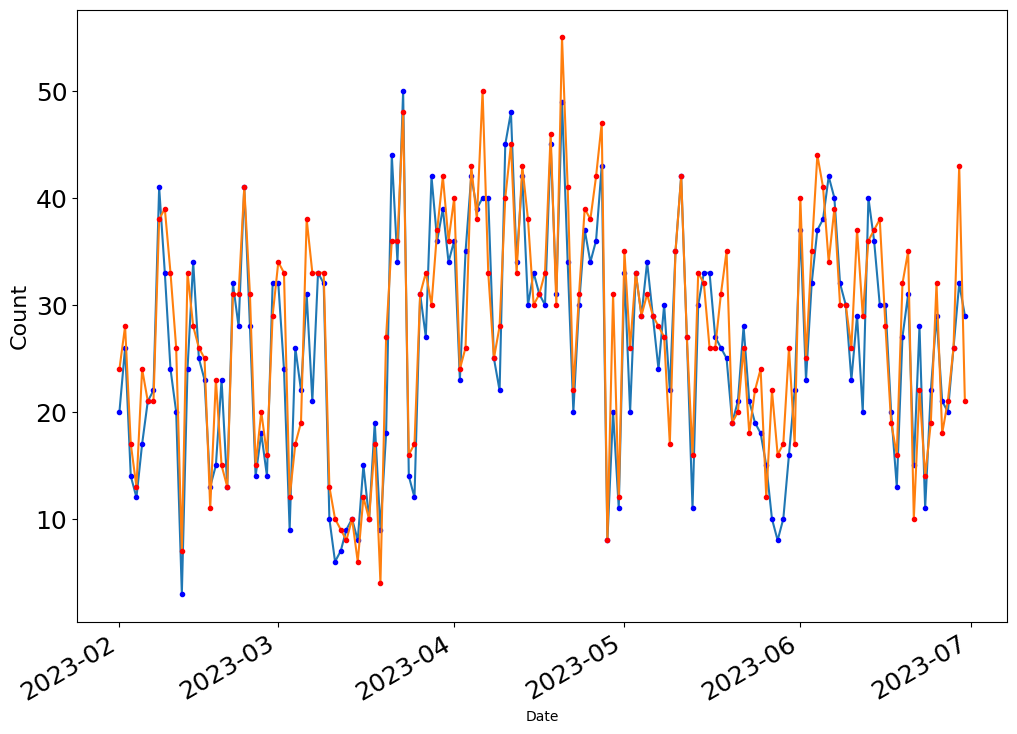

In [10]:
fig, ax1 = plt.subplots(figsize=(12, 9))
ax1.plot_date( df_pu['started_at_date'], df_pu['pu_ct'],linestyle = 'solid',markeredgecolor = 'blue',markerfacecolor = 'blue', markersize = 3)
ax1.plot_date( df_do['ended_at_date'], df_do['do_ct'],linestyle = 'solid',markeredgecolor = 'red',markerfacecolor = 'red', markersize = 3)

ax1.set_xlabel('Date',fontsize=10)
ax1.set_ylabel('Count',fontsize=16)
plt.gcf().autofmt_xdate()

plt.tick_params(labelsize=18)
plt.show()

## Reading Weather Data

In [11]:
df_weather = pd.read_csv('/content/drive/Shareddrives/DNSC 6314/washington, dc 2023-01-01 to 2023-12-31.csv')

df_weather.head()

,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
0,"washington, dc",2023-01-01,61.4,43.5,51.8,61.4,41.7,51.2,46.2,82.2,...,8.7,4,10,2023-01-01T07:26:52,2023-01-01T16:56:42,0.32,"Rain, Partially cloudy",Clearing in the afternoon with morning rain.,rain,"KDCA,72405013743,72403793728,KADW,KDAA,AS365,7..."
1,"washington, dc",2023-01-02,63.0,40.0,50.9,63.0,36.3,50.2,44.2,79.3,...,5.7,4,10,2023-01-02T07:26:59,2023-01-02T16:57:31,0.35,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"KDCA,72405013743,72403793728,KADW,KDAA,AS365,7..."
2,"washington, dc",2023-01-03,68.0,50.1,59.3,68.0,50.1,59.3,52.3,78.5,...,3.4,2,10,2023-01-03T07:27:04,2023-01-03T16:58:22,0.39,Overcast,Cloudy skies throughout the day.,cloudy,"KDCA,72405013743,72403793728,KADW,KDAA,AS365,7..."
3,"washington, dc",2023-01-04,65.0,53.3,59.5,65.0,53.3,59.5,55.0,85.4,...,2.8,2,10,2023-01-04T07:27:07,2023-01-04T16:59:14,0.42,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"KDCA,72405013743,72403793728,KADW,KDAA,AS365,7..."
4,"washington, dc",2023-01-05,64.0,49.6,56.4,64.0,45.1,55.9,46.0,70.4,...,6.0,4,10,2023-01-05T07:27:08,2023-01-05T17:00:08,0.46,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"KDCA,72405013743,72403793728,KADW,KDAA,AS365,7..."


## Check missing values

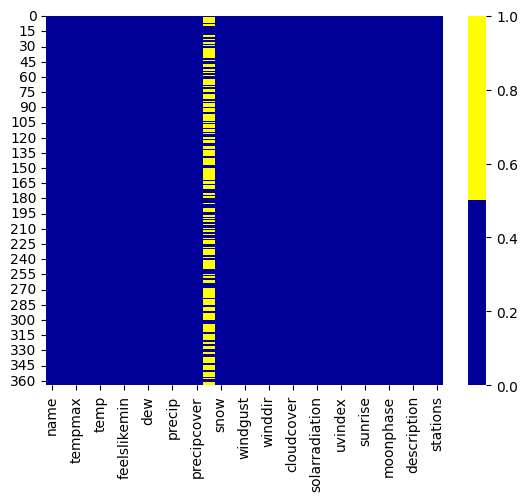

In [12]:
# Date time format
df_weather['datetime'] = pd.to_datetime(df_weather['datetime']).dt.date

# Use sns heatmap to see whats are the null values.
coln = df_weather.columns[:df_weather.shape[1]]
colors = ['#000099','#ffff00'] # specify the colors - yellow is missing. blue is not missing.
sns.heatmap(df_weather[coln].isnull(), cmap = sns.color_palette(colors))
plt.show()

## Drop weather data variables

In [13]:
# Drop unnecessary variables
df_weather=df_weather.drop(columns=['name', 'stations','description','sunrise','sunset','conditions','severerisk','preciptype','windgust'])

## Prepare X and y: Merge weather data with trip data

In [14]:
# Merge with weather data and remove dates and station name
# pickup data
df_m_pu = df_pu.merge(df_weather, left_on='started_at_date', right_on='datetime')
df_m_pu = df_m_pu.drop(columns=['started_at_date','datetime'])

# dropoff data
df_m_do = df_do.merge(df_weather, left_on='ended_at_date', right_on='datetime')
df_m_do = df_m_do.drop(columns=['ended_at_date','datetime'])

In [15]:
df_m_pu.head()

,start_station_name,pu_ct,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,moonphase,icon
0,22nd & H St NW,20,40.7,32.5,35.6,37.4,23.9,29.1,21.6,59.4,...,15.3,347.8,1025.5,81.8,9.1,130.3,11.2,6,0.36,snow
1,22nd & H St NW,26,41.8,31.3,36.0,36.8,28.1,32.2,22.5,59.2,...,11.3,199.9,1021.8,94.5,9.9,87.7,7.5,4,0.40,cloudy
2,22nd & H St NW,14,40.7,19.8,31.7,34.1,4.3,20.7,10.5,43.4,...,28.1,317.1,1021.4,54.6,9.9,143.9,12.5,6,0.43,partly-cloudy-day
3,22nd & H St NW,12,31.9,16.9,24.5,23.0,2.6,15.1,2.1,37.9,...,16.9,221.9,1035.2,27.8,9.9,150.7,13.1,6,0.46,partly-cloudy-day
4,22nd & H St NW,17,58.8,33.0,44.2,58.8,22.9,39.9,22.3,42.6,...,17.9,195.8,1022.1,79.7,9.9,116.1,9.9,5,0.50,partly-cloudy-day


In [16]:
df_m_do.head()

,end_station_name,do_ct,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,moonphase,icon
0,22nd & H St NW,24,40.7,32.5,35.6,37.4,23.9,29.1,21.6,59.4,...,15.3,347.8,1025.5,81.8,9.1,130.3,11.2,6,0.36,snow
1,22nd & H St NW,28,41.8,31.3,36.0,36.8,28.1,32.2,22.5,59.2,...,11.3,199.9,1021.8,94.5,9.9,87.7,7.5,4,0.40,cloudy
2,22nd & H St NW,17,40.7,19.8,31.7,34.1,4.3,20.7,10.5,43.4,...,28.1,317.1,1021.4,54.6,9.9,143.9,12.5,6,0.43,partly-cloudy-day
3,22nd & H St NW,13,31.9,16.9,24.5,23.0,2.6,15.1,2.1,37.9,...,16.9,221.9,1035.2,27.8,9.9,150.7,13.1,6,0.46,partly-cloudy-day
4,22nd & H St NW,24,58.8,33.0,44.2,58.8,22.9,39.9,22.3,42.6,...,17.9,195.8,1022.1,79.7,9.9,116.1,9.9,5,0.50,partly-cloudy-day


# **Group Assignment Part1**

In [17]:
from sklearn.model_selection  import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt

**Task1 :** Explore and discuss the relationships among selected weather features (of your choice) and target variables (i.e., pu_ct and do_ct in the preprocessed data), possibly utilizing visualizations like a scatterplot matrix.

In [18]:
#Get the column names of the df_weather DataFrame
df_weather.columns

Index(['datetime', 'tempmax', 'tempmin', 'temp', 'feelslikemax',
       'feelslikemin', 'feelslike', 'dew', 'humidity', 'precip', 'precipprob',
       'precipcover', 'snow', 'snowdepth', 'windspeed', 'winddir',
       'sealevelpressure', 'cloudcover', 'visibility', 'solarradiation',
       'solarenergy', 'uvindex', 'moonphase', 'icon'],
      dtype='object')

**Target Variables: PICKUPS (pu_ct)**

In [19]:
#PICKUPS: Exploring relationships between pick up count and weather features using correlation matrix

pu_ct_corr = df_m_pu[['pu_ct','tempmax', 'tempmin', 'temp', 'feelslikemax',
                      'feelslikemin', 'feelslike', 'dew', 'humidity', 'precip',
                      'precipprob','precipcover', 'snow', 'snowdepth', 'windspeed',
                      'winddir','sealevelpressure', 'cloudcover', 'visibility', 'solarradiation',
                      'solarenergy', 'uvindex', 'moonphase', 'icon']].corr().iloc[1:, :1]

# Sorting correlation values in descending order
pu_ct_corr.sort_values(by = "pu_ct", axis=0, ascending=False, inplace=False,
                       kind='quicksort', na_position='last', ignore_index=False, key=None)

<ipython-input-19-160b885b0277>:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  'solarenergy', 'uvindex', 'moonphase', 'icon']].corr().iloc[1:, :1]


,pu_ct
uvindex,0.447322
feelslikemax,0.418616
tempmax,0.414777
solarenergy,0.396304
solarradiation,0.395291
feelslike,0.345536
temp,0.322562
feelslikemin,0.242066
tempmin,0.201049
winddir,0.161662


Based on the correlation matrix, we have selected the following weather features for pick-up count (pu_ct): 'uvindex', 'feelslike', 'winddir', 'tempmax', 'precipcover', 'solarenergy'. These variables have some of the higher correlations (in terms of absolute value), and we chose to not include 'feelslikemax' as it might have multicollinearity with 'tempmax'. We also did not include 'solarenergy' due to its potential muticollinearity with 'solarradiation'.

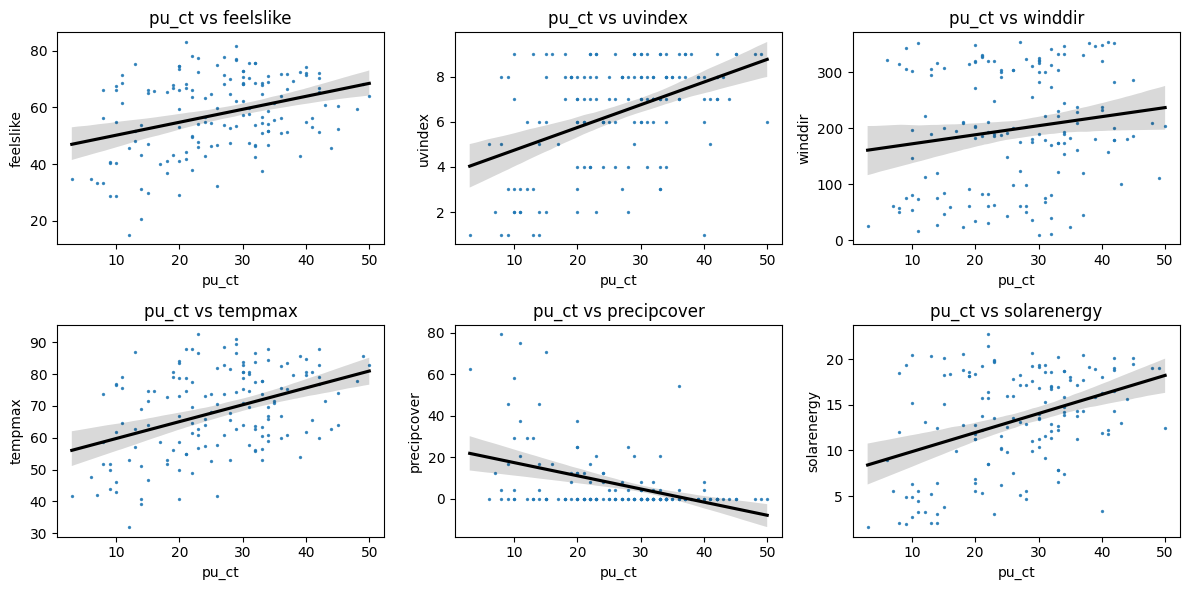

In [20]:
# Visualizing scatterplot matrix for pick-up count and selected weather features

from scipy import stats

# Selected weather features for pick-up count
variables = ['feelslike', 'uvindex','winddir','tempmax','precipcover','solarenergy']

# Number of rows
n_rows = 2

# Calculate the number of columns, rounding up to fit all variables
n_cols = math.ceil(len(variables) / n_rows)

# Create a figure with subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(4 * n_cols, 3 * n_rows))  # Adjust the size as needed

# Flatten the axes array for easy iteration
axes = axes.flatten()

for i, var in enumerate(variables):
    # Perform a regression plot
    sns.regplot(x='pu_ct', y=var, data=df_m_pu, ax=axes[i], scatter_kws={'s': 2}, line_kws={'color': 'black'})

    # Calculate the slope of the regression line
    slope, intercept, r_value, p_value, std_err = stats.linregress(df_m_pu['pu_ct'], df_m_pu[var])

    # Set the title and annotate the plot with the slope
    axes[i].set_title(f'pu_ct vs {var}')

# If there are any remaining empty subplots, turn them off
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

For pick-up counts, the scatterplot matrix analysis reveals:

**Positive relationships:**

'uvindex': Higher UV index correlates with increased pick-up counts.

'feelslike': Warmer temperatures lead to higher pick-up counts.

'winddir': Certain wind directions show higher pick-up counts.

'tempmax': Higher maximum temperatures coincide with increased pick-up counts.

'solarenergy': More solar energy corresponds to higher pick-up counts.

**Negative relationship:**

'precipcover': Rainy days are associated with lower pick-up counts.

**Target Variables: DROPOFFS (do_ct)**

In [21]:
#DROPOFFS: Exploring relationships between drop off count and weather features using correlation matrix
do_ct_corr = df_m_do[['do_ct','tempmax', 'tempmin', 'temp', 'feelslikemax',
                      'feelslikemin', 'feelslike', 'dew', 'humidity', 'precip', 'precipprob',
                      'precipcover', 'snow', 'snowdepth', 'windspeed', 'winddir',
                      'sealevelpressure', 'cloudcover', 'visibility', 'solarradiation',
                      'solarenergy', 'uvindex', 'moonphase', 'icon']].corr().iloc[1:, :1]

# Sorting correlation values in descending order
do_ct_corr.sort_values(by = "do_ct", axis=0, ascending=False, inplace=False,
                       kind='quicksort', na_position='last', ignore_index=False, key=None)

<ipython-input-21-4352964e1875>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  'solarenergy', 'uvindex', 'moonphase', 'icon']].corr().iloc[1:, :1]


,do_ct
uvindex,0.439801
tempmax,0.409863
feelslikemax,0.409044
solarradiation,0.369002
solarenergy,0.368381
feelslike,0.347944
temp,0.329028
feelslikemin,0.252089
tempmin,0.220074
dew,0.165338


Based on the correlation matrix, we have selected the following weather features for drop-off count (do_ct): 'uvindex', 'tempmax', 'precipcover', 'feelslikemax', 'solarradiation'. In terms of absolute values, these have the highest correlations with do_ct.

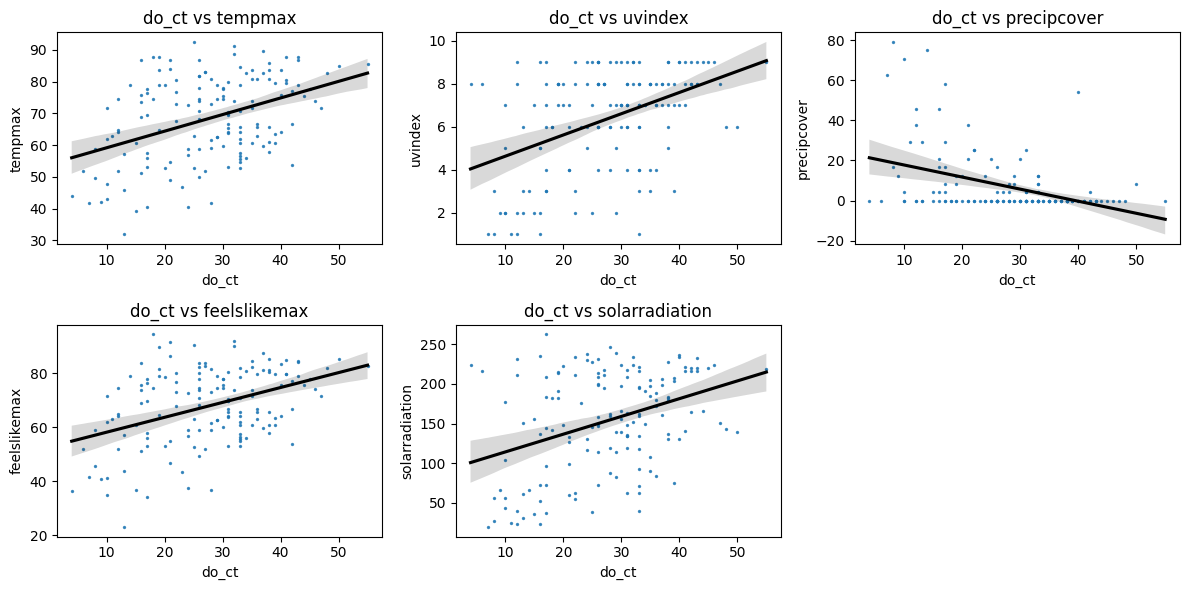

In [22]:
# Visualizing scatterplot matrix for drop-off count and selected weather features

# Selected weather features for drop-off count
variables = ['tempmax', 'uvindex','precipcover','feelslikemax','solarradiation']

# Number of rows
n_rows = 2

# Calculate the number of columns, rounding up to fit all variables
n_cols = math.ceil(len(variables) / n_rows)

# Create a figure with subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(4 * n_cols, 3 * n_rows))  # Adjust the size as needed

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop over the variables and axes to create each subplot
for i, var in enumerate(variables):
    # Perform a regression plot
    sns.regplot(x='do_ct', y=var, data=df_m_do, ax=axes[i], scatter_kws={'s': 2}, line_kws={'color': 'black'})

    # Calculate the slope of the regression line
    slope, intercept, r_value, p_value, std_err = stats.linregress(df_m_do['do_ct'], df_m_do[var])

    # Set the title and annotate the plot with the slope
    axes[i].set_title(f'do_ct vs {var}')

# If there are any remaining empty subplots, turn them off
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

For drop-off counts, the scatterplot matrix analysis reveals:

**Positive relationships:**

'tempmax': Higher maximum temperatures are linked to increased drop-off counts.

'uvindex': Greater UV index values correspond to higher drop-off counts.

'feelslikemax': Warmer perceived temperatures are associated with higher drop-off counts.

'solarradiation': Higher solar radiation levels coincide with increased drop-off counts.

*Due to the similar multicollinaeriy concern as mentioned above in pick_up count, solarenergy will be removed in the following regression analysis for drop_off counts.*

**Negative relationship:**

'precipcover': Increased precipitation cover is associated with lower drop-off counts.

**Task2 :** Build a series of linear regression models: begin with a single feature (e.g., 'temp') and progressively incorporate additonal features ('temp', 'precip', 'humidity', 'windspeed', 'uvindex', 'dew', etc.). Display and analyze the changes in training and test Mean Squared Errors (MSEs) when introducing more features in a plot (e.g., in line chart) for pu_ct and do_ct, respectively.

**PICKUPS (pu_ct)**

Based on a combination of looking at trends and correlation, we picked variables (uvindex, feelslike, winddir, tempmax, precip, and solarenergy) to feed the model. Based on correlation, temp should be included as well, however, it is very related to 'feelslike' and thus we decided to not include this variable in the model.

In [23]:
# Prepare pick up data
y_pu = df_m_pu['pu_ct']
X_pu = df_m_pu.drop('pu_ct', axis=1)
X_pu = pd.get_dummies(data=X_pu, drop_first=True)

# Split into training and test
X_train_pu, X_test_pu, y_train_pu, y_test_pu = train_test_split(X_pu, y_pu, test_size=0.2, random_state=42)


# Create a DataFrame to store results
mse_results_pu = pd.DataFrame(columns=['Features', 'Train MSE', 'Test MSE'])

# Selected weather features (of our choice)
features_pu = ['uvindex','feelslike','winddir','tempmax','precipcover','solarenergy']


# Incrementally introduce features and train models
for i in range(1, len(features_pu) + 1):
    selected_features = features_pu[:i]
    X_train_feature = X_train_pu[selected_features]
    X_test_feature = X_test_pu[selected_features]

    # Build a linear regression model
    linear_regressor = LinearRegression()
    linear_regressor.fit(X_train_feature, y_train_pu)

    # Predictions
    y_pred_train = linear_regressor.predict(X_train_feature)
    y_pred_test = linear_regressor.predict(X_test_feature)

    # Calculate MSE
    mse_train = mean_squared_error(y_train_pu, y_pred_train)
    mse_test = mean_squared_error(y_test_pu, y_pred_test)

    # Store results
    mse_results_pu = mse_results_pu.append({'Features': ', '.join(selected_features), 'Train MSE': mse_train, 'Test MSE': mse_test}, ignore_index=True)

print(mse_results_pu)

                                            Features  Train MSE   Test MSE
0                                            uvindex  86.921539  90.818779
1                                 uvindex, feelslike  80.200614  91.354030
2                        uvindex, feelslike, winddir  77.852045  85.487768
3               uvindex, feelslike, winddir, tempmax  76.164138  82.680788
4  uvindex, feelslike, winddir, tempmax, precipcover  67.815585  86.877284
5  uvindex, feelslike, winddir, tempmax, precipco...  64.047151  93.387781


<ipython-input-23-f462d836340f>:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  mse_results_pu = mse_results_pu.append({'Features': ', '.join(selected_features), 'Train MSE': mse_train, 'Test MSE': mse_test}, ignore_index=True)
<ipython-input-23-f462d836340f>:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  mse_results_pu = mse_results_pu.append({'Features': ', '.join(selected_features), 'Train MSE': mse_train, 'Test MSE': mse_test}, ignore_index=True)
<ipython-input-23-f462d836340f>:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  mse_results_pu = mse_results_pu.append({'Features': ', '.join(selected_features), 'Train MSE': mse_train, 'Test MSE': mse_test}, ignore_index=True)
<ipython-input-23-f462d836340f>:36: FutureW

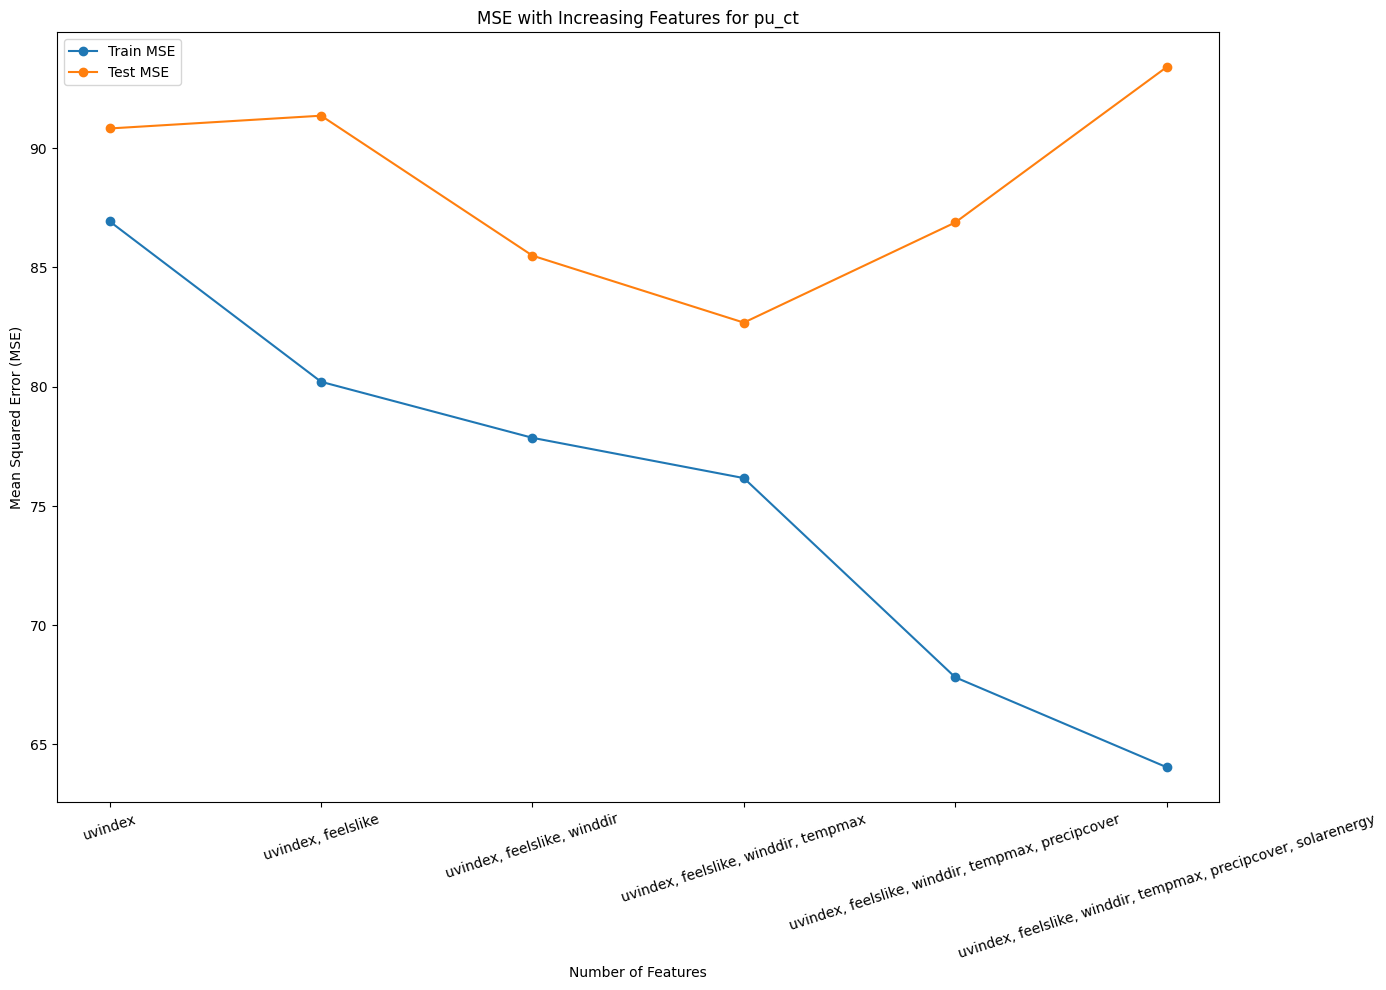

In [24]:
plt.figure(figsize=(15, 10))
plt.plot(mse_results_pu['Features'], mse_results_pu['Train MSE'], marker='o', label='Train MSE')
plt.plot(mse_results_pu['Features'], mse_results_pu['Test MSE'], marker='o', label='Test MSE')
plt.title('MSE with Increasing Features for pu_ct')
plt.xlabel('Number of Features')
plt.ylabel('Mean Squared Error (MSE)')
plt.xticks(rotation=18)
plt.legend()
plt.show()

The model that includes 'uvindex', 'feelslike', 'winddir', and 'tempmax' features achieves the lowest test MSE of 82.680788 among the models, suggesting superior predictive performance for pick-up counts compared to other models.

**DROPOFF (do_ct)**

Based on a combination of looking at trends and correlation, we picked variables (uvindex, tempmax, precipcover, feelslikemax, solarradiation, solarenergy) to feed the model.

In [25]:
# Prepare drop off data
y_do = df_m_do['do_ct']
X_do = df_m_do.drop('do_ct', axis=1)
X_do= pd.get_dummies(data=X_do, drop_first=True)

# Split into training and test
X_train_do, X_test_do, y_train_do, y_test_do = train_test_split(X_do, y_do, test_size=0.2, random_state=42)

# Create a DataFrame to store results
mse_results_do = pd.DataFrame(columns=['Features', 'Train MSE', 'Test MSE'])

# Selected weather features (of our choice)
features_do = ['uvindex', 'tempmax', 'precipcover','feelslikemax','solarradiation']

# Incrementally introduce features and train models
for i in range(1, len(features_do) + 1):
    selected_features = features_do[:i]
    X_train_feature = X_train_do[selected_features]
    X_test_feature = X_test_do[selected_features]

    # Build a linear regression model
    linear_regressor = LinearRegression()
    linear_regressor.fit(X_train_feature, y_train_do)

    # Predictions
    y_pred_train = linear_regressor.predict(X_train_feature)
    y_pred_test = linear_regressor.predict(X_test_feature)

    # Calculate MSE
    mse_train = mean_squared_error(y_train_do, y_pred_train)
    mse_test = mean_squared_error(y_test_do, y_pred_test)

    # Store results
    mse_results_do = mse_results_do.append({'Features': ', '.join(selected_features), 'Train MSE': mse_train, 'Test MSE': mse_test}, ignore_index=True)

print(mse_results_do)


                                            Features  Train MSE    Test MSE
0                                            uvindex  85.054307  102.451369
1                                   uvindex, tempmax  78.166252   96.746344
2                      uvindex, tempmax, precipcover  69.595795   95.908380
3        uvindex, tempmax, precipcover, feelslikemax  65.868549  109.049979
4  uvindex, tempmax, precipcover, feelslikemax, s...  60.209545  117.058891


<ipython-input-25-52bf16f96f02>:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  mse_results_do = mse_results_do.append({'Features': ', '.join(selected_features), 'Train MSE': mse_train, 'Test MSE': mse_test}, ignore_index=True)
<ipython-input-25-52bf16f96f02>:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  mse_results_do = mse_results_do.append({'Features': ', '.join(selected_features), 'Train MSE': mse_train, 'Test MSE': mse_test}, ignore_index=True)
<ipython-input-25-52bf16f96f02>:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  mse_results_do = mse_results_do.append({'Features': ', '.join(selected_features), 'Train MSE': mse_train, 'Test MSE': mse_test}, ignore_index=True)
<ipython-input-25-52bf16f96f02>:34: FutureW

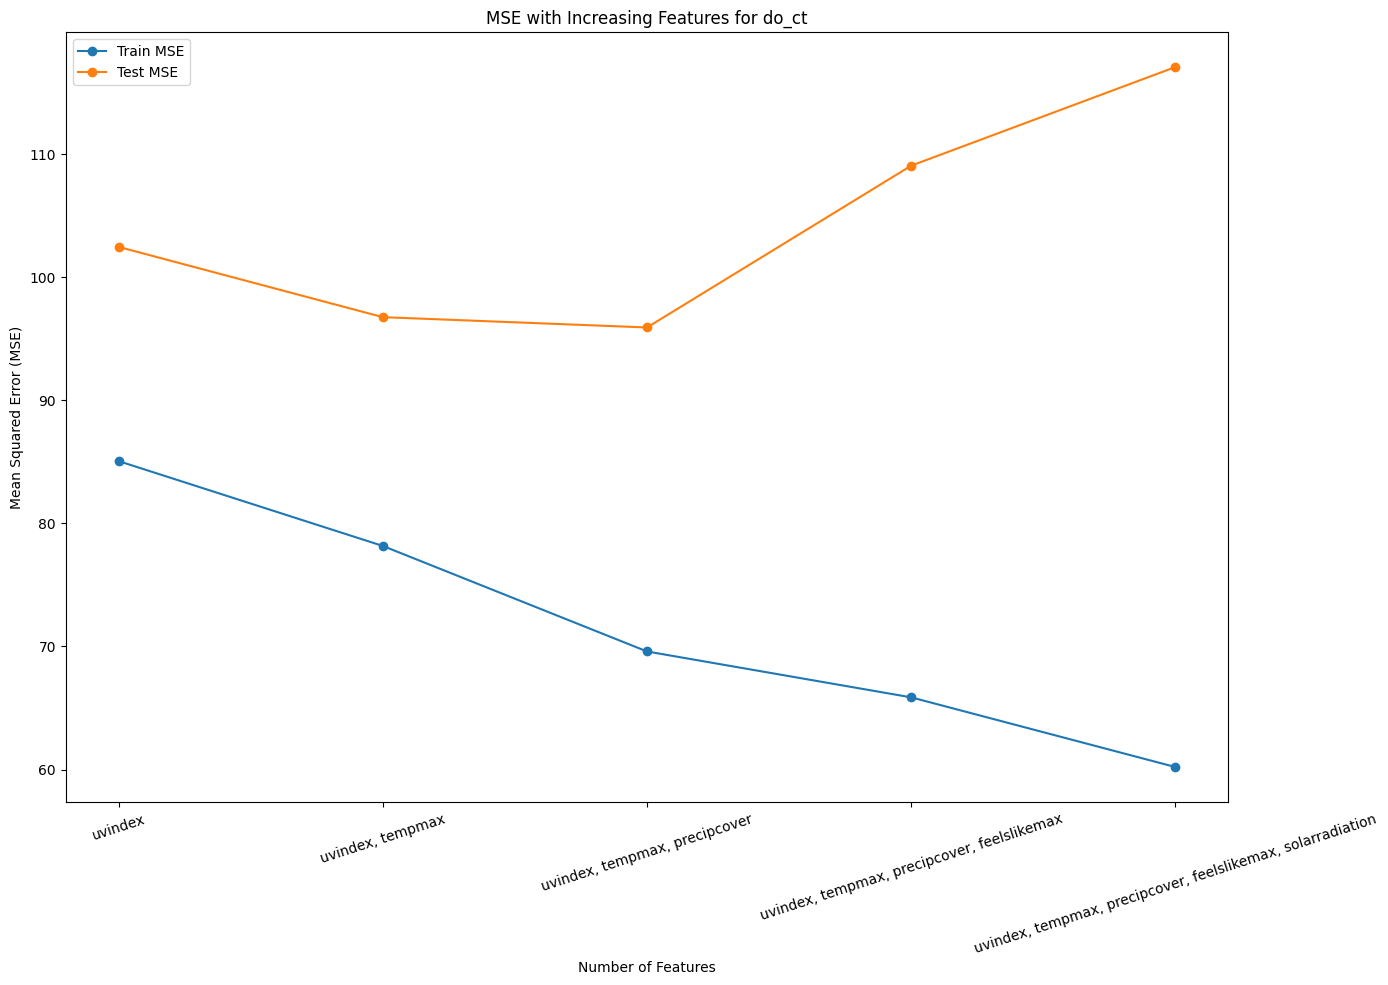

In [26]:
plt.figure(figsize=(15, 10))
plt.plot(mse_results_do['Features'], mse_results_do['Train MSE'], marker='o', label='Train MSE')
plt.plot(mse_results_do['Features'], mse_results_do['Test MSE'], marker='o', label='Test MSE')
plt.title('MSE with Increasing Features for do_ct')
plt.xlabel('Number of Features')
plt.ylabel('Mean Squared Error (MSE)')
plt.xticks(rotation=18)
plt.legend()
plt.show()

The model that includes the 'uvindex', 'tempmax', and 'precipcover' features achieves the lowest test MSE of 95.908380 among the models, indicating superior predictive performance for drop-off counts compared to other models.

**Task3:** Based on the observation in 2), determine the best linear regression models for predicting pu_ct and do_ct, respectively.

Based on the observations in Task 2, select the model with the lowest test MSE for both pickups and dropoffs.



**For pu_ct: The model featuring 'feelslike', 'winddir', 'uvindex', and 'tempmax' achieves the lowest test MSE of 82.680788.**

**For do_ct: The model including 'uvindex', 'tempmax', and 'precipcover' attains the lowest test MSE of 95.908380.**

**Task4:** Imaging that we are showcasing the prediction models to the operations managers of Capital Bikeshare. Illustrate the computation of the predicted pu_ct and do_ct using the chosen models, e.g., demonstration using the first instance in the test data (X_test.iloc[0,:]).

In [27]:
# Chosen features for pu_ct
selected_features_pu = ['feelslike','winddir','uvindex','tempmax']

# Chosen features for do_ct
selected_features_do = ['uvindex', 'tempmax', 'precipcover']

# Extract the first instance from the test data
sample_instance_pu = X_test_pu.iloc[0, :]
sample_instance_do = X_test_do.iloc[0, :]

# Model for pu_ct
linear_regressor_pu = LinearRegression()
linear_regressor_pu.fit(X_train_pu[selected_features_pu], y_train_pu)
pu_pred = linear_regressor_pu.predict([sample_instance_pu[selected_features_pu]])

# Model for do_ct
linear_regressor_do = LinearRegression()
linear_regressor_do.fit(X_train_do[selected_features_do], y_train_do)
do_pred = linear_regressor_do.predict([sample_instance_do[selected_features_do]])

# Display the results
print("Predicted pu_ct:", pu_pred[0])
print("Predicted do_ct:", do_pred[0])

Predicted pu_ct: 28.25296407147155
Predicted do_ct: 27.09643601852616


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


**According to the regression models, the predicted average pick-up count is 28, and the predicted average drop-off count is 27.**

These predictions are derived from the regression coefficients, which quantify the impact of each feature on the predicted count.

In [28]:
# Retrieveing the regression coefficients for the pick-up count (pu_ct) model
regression_coefficients = linear_regressor_pu.coef_

for feature, coefficient in zip(selected_features_pu, regression_coefficients):
    print(f"{feature}: {coefficient}")

feelslike: -0.14987131786207075
winddir: 0.014461883397543979
uvindex: 0.9504245082481337
tempmax: 0.4142628177233151


**For the pick-up count (pu_ct) model:**

For every one-unit increase in 'feelslike', we expect a decrease of approximately 0.15 in the predicted count.

For every one-unit increase in 'winddir', we expect an increase of approximately 0.01 in the predicted count.

For every one-unit increase in 'uvindex', we expect an increase of approximately 0.95 in the predicted count.

For every one-unit increase in 'tempmax', we expect an increase of approximately 0.41 in the predicted count.

In [29]:
# Retrieveing the regression coefficients for the drop-off count (do_ct) model
regression_coefficients = linear_regressor_do.coef_

for feature, coefficient in zip(selected_features_do, regression_coefficients):
    print(f"{feature}: {coefficient}")

uvindex: 0.3207104434920582
tempmax: 0.27655312793763376
precipcover: -0.2249669084578106


**For the drop-off count (do_ct) model:**

For every one-unit increase in 'uvindex', we expect an increase of approximately 0.32 in the predicted count.

For every one-unit increase in 'tempmax', we expect an increase of approximately 0.28 in the predicted count.

For every one-unit increase in 'precipcover', we expect a decrease of approximately 0.22 in the predicted count.

In the code above, one can observe the regression coefficients for our model. Using these coefficients, the code then applies them to the features of the first instance (0) by multiplying them with the corresponding variables and summing them together.

**Task5:**  Using the predicted pu_ct and do_ct for X_test.iloc[0,:] as an example, discuss the optimal number of bikes and docks to allocate for the station at GWSB.

**Pickup variables: the optimal number of bikes**

In [30]:
# Retrieveing the regression coefficients for the pick-up count (pu_ct) model
regression_coefficients = linear_regressor_pu.coef_

coefficients_dict_pu = {}

for feature, coefficient in zip(selected_features_pu, regression_coefficients):
    coefficients_dict_pu[feature] = coefficient

print(coefficients_dict_pu)
print('intercept: ', linear_regressor_pu.intercept_)

{'feelslike': -0.14987131786207075, 'winddir': 0.014461883397543979, 'uvindex': 0.9504245082481337, 'tempmax': 0.4142628177233151}
intercept:  -2.9713668363432966


In [31]:
avg_feelslike = df_m_pu[df_pu['start_station_name'] == '22nd & H St NW']['feelslike'].mean()
avg_winddir = df_m_pu[df_pu['start_station_name'] == '22nd & H St NW']['winddir'].mean()
avg_uvindex = df_m_pu[df_pu['start_station_name'] == '22nd & H St NW']['uvindex'].mean()
avg_tempmax = df_m_pu[df_pu['start_station_name'] == '22nd & H St NW']['tempmax'].mean()

We calculate the average values of the weather features 'feelslike', 'winddir', 'uvindex', and 'tempmax' for the GWSB station ('22nd & H St NW'). We assume that these average values represent the typical weather conditions at the GWSB station.

In [32]:
# PICKUP PREDICTION @ GWSB
pu_prediction=(coefficients_dict_pu['feelslike']*avg_feelslike)+(coefficients_dict_pu['winddir']*avg_winddir)+(coefficients_dict_pu['uvindex']*avg_uvindex)+(coefficients_dict_pu['tempmax']*avg_tempmax)-2.9713668363432966
print(pu_prediction)

25.63750256718624


Then, using the coefficients obtained from the linear regression model, we compute the predicted pick-up count (pu_ct) for the GWSB station. We multiply each average weather feature value by its corresponding coefficient, sum these products, and finally subtract the intercept term to obtain the predicted pick-up count.

**Based on the average weather conditions at the GWSB station, the predicted pick-up count of approximately 25.64 bikes suggests allocating 26 bikes at the GWSB station.**

**Dropoff variables: the optimal number of docks**

In [33]:
# Retrieveing the regression coefficients for the drop-off count (do_ct) model
regression_coefficients = linear_regressor_do.coef_

coefficients_dict_do = {}

for feature, coefficient in zip(selected_features_do, regression_coefficients):
    coefficients_dict_do[feature] = coefficient

print(coefficients_dict_do)
print('intercept: ', linear_regressor_do.intercept_)

{'uvindex': 0.3207104434920582, 'tempmax': 0.27655312793763376, 'precipcover': -0.2249669084578106}
intercept:  7.966379638122515


In [34]:
avg_uvindex = df_m_do[df_do['end_station_name'] == '22nd & H St NW']['uvindex'].mean()

avg_tempmax = df_m_do[df_do['end_station_name'] == '22nd & H St NW']['tempmax'].mean()

avg_precipcover = df_m_do[df_do['end_station_name'] == '22nd & H St NW']['precipcover'].mean()

We calculate the average values of the weather features 'uvindex', 'tempmax', 'precipcover' for the GWSB station ('22nd & H St NW'). We assume that these average values represent the typical weather conditions at the GWSB station.

In [35]:
#DROPOFF PREDICTION @ GWSB
do_prediction=(coefficients_dict_do['uvindex']*avg_uvindex)+(coefficients_dict_do['tempmax']*avg_tempmax)+(coefficients_dict_do['precipcover']*avg_precipcover)+ 7.966379638122515
print(do_prediction)

27.301668220892363


**Based on the average weather conditions at the GWSB station, the predicted drop-off count of approximately 27.30 docks suggests allocating 28 docks at the GWSB station.**

**In the realistic scenario with the GWSB station that has only 17 docks available, distributing the resources to accommodate approximately 8 bikes and 9 available docks for drop-offs would be the most effective way to mirror the optimal conditions suggested by our model. This setup ensures that there's a balance between the number of bikes available for users to pick up and the number of docks available for users to return their bikes, adhering as closely as possible to the optimal bike-to-dock ratio within the given limitations.**